In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/Data/pics.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
pics/                                          2020-01-05 15:41:14            0
pics/free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg 2020-01-05 15:40:50        76394
__MACOSX/                                      2020-01-05 15:41:48            0
__MACOSX/pics/                                 2020-01-05 15:41:48            0
__MACOSX/pics/._free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg 2020-01-05 15:40:50          527
pics/free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg 2020-01-05 15:41:14        78019
__MACOSX/pics/._free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg 2020-01-05 15:41:14          518
pics/m-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg 2020-01-05 15:40:34        35397
__MACOSX/pics/._m-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg 2020-01-05 15:40:34          520
pics/l-rs19stkt-b-rope-original-imafeeuhwywtgzwy.jpeg 2020-01-05 15:39:50        23563
__MACO

In [7]:
ls '/content/pics'

4xl-black-gown-pavitra-original-imafn9dh5hpdhq2w.jpeg
free-hm-kash-1023-m-s-retail-original-imafh9cvkghrphwc.jpeg
free-hm-kash-1023-m-s-retail-original-imafh9cvsq7hz2uy.jpeg
free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg
free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg
free-sari-5-mithark-original-imafm5hgnhavxu3h.jpeg
free-sari-5-mithark-original-imafm5hgv3qwvaxh.jpeg
l-black-dori-pmd-fashion-original-imafn2rcyx4hqs4e.jpeg
l-rs19stkt-b-rope-original-imafeeuhmfuyzj7f.jpeg
l-rs19stkt-b-rope-original-imafeeuhwywtgzwy.jpeg
m-black-dori-pmd-fashion-original-imafn2rydq93dfky.jpeg
m-black-gown-pavitra-original-imafn9dhf4fs94gt.jpeg
m-pr343white-prakhya-original-imafj5awct4fryr7.jpeg
m-pr343white-prakhya-original-imafj5awhczfzwz3.jpeg
m-pr343white-prakhya-original-imafj5awnfunzpba.jpeg
m-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg
m-rs19stkt-b-rope-original-imafeeug9ak3rpsp.jpeg
m-rs19stkt-b-rope-original-imafeeugebf5nghr.jpeg
xxl-black-dori-pmd-fashion-original-imafn2rku

In [38]:
L=['4xl-black-gown-pavitra-original-imafn9dh5hpdhq2w.jpeg',
'free-hm-kash-1023-m-s-retail-original-imafh9cvkghrphwc.jpeg',
'free-hm-kash-1023-m-s-retail-original-imafh9cvsq7hz2uy.jpeg',
'free-hm-kash-1023-m-s-retail-original-imafh9cvv8t4wycu.jpeg',
'free-sari-5-mithark-original-imafm5hgeyeehvtu.jpeg',
'free-sari-5-mithark-original-imafm5hgnhavxu3h.jpeg',
'free-sari-5-mithark-original-imafm5hgv3qwvaxh.jpeg',
'l-black-dori-pmd-fashion-original-imafn2rcyx4hqs4e.jpeg',
'l-rs19stkt-b-rope-original-imafeeuhmfuyzj7f.jpeg',
'l-rs19stkt-b-rope-original-imafeeuhwywtgzwy.jpeg',
'm-black-dori-pmd-fashion-original-imafn2rydq93dfky.jpeg',
'm-black-gown-pavitra-original-imafn9dhf4fs94gt.jpeg',
'm-pr343white-prakhya-original-imafj5awct4fryr7.jpeg',
'm-pr343white-prakhya-original-imafj5awhczfzwz3.jpeg',
'm-pr343white-prakhya-original-imafj5awnfunzpba.jpeg',
'm-pr343white-prakhya-original-imafj5awvx26z9hq.jpeg',
'm-rs19stkt-b-rope-original-imafeeug9ak3rpsp.jpeg',
'm-rs19stkt-b-rope-original-imafeeugebf5nghr.jpeg',
'xxl-black-dori-pmd-fashion-original-imafn2rkut8uz4uz.jpeg',
'xxl-black-gown-pavitra-original-imafn9dhjk9dayx5.jpeg']

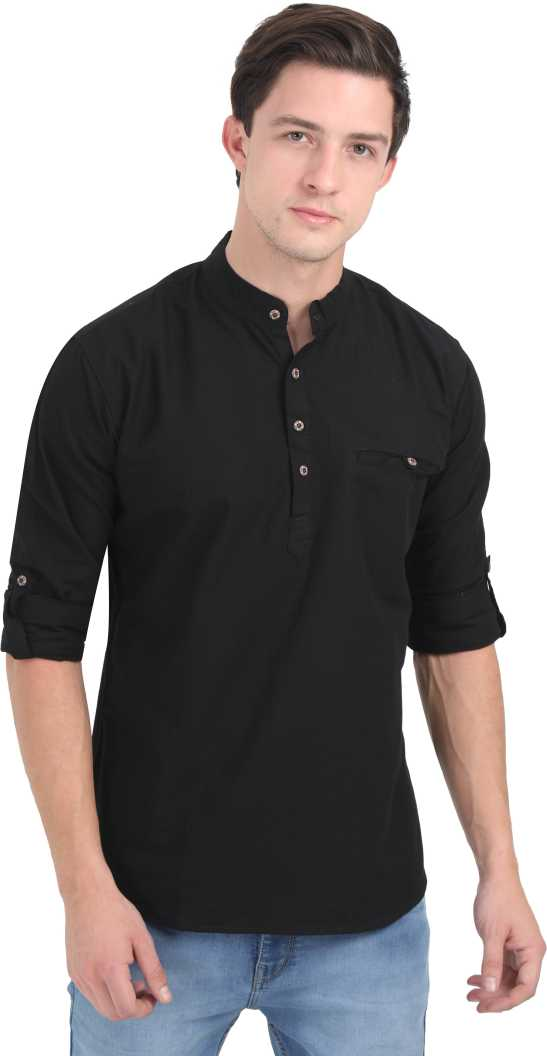

In [25]:
import random
from IPython.display import Image
r = random.randint(0,len(L)-1)
Image('/content/pics/'+L[r])

In [284]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

def preprocess_img(img_path):
  img = load_img(img_path,target_size=(32,32)) 
  img = img_to_array(img) 
  img = img/255.
  return img

In [285]:
imgs = [preprocess_img('/content/pics/'+l) for l in L]
imgs = np.array(imgs)
imgs.shape

(20, 32, 32, 3)

In [40]:
imgs = imgs.reshape(20,250*150*3)

In [287]:
import cv2
imgs_gray =np.array([cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in imgs])

In [288]:
imgs.shape

(20, 32, 32, 3)

In [331]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(imgs.reshape(-1,32*32*3))
kmeans.labels_

array([4, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 1, 1, 1, 1, 2, 2, 3, 4],
      dtype=int32)

In [344]:
cluster_1=[kmeans.labels_==4]
list(cluster_1)

[array([ True, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False,  True])]

In [345]:
cluster_1_imgs=[]
for i,l in enumerate(cluster_1[0]):
  if l==True:
    cluster_1_imgs.append(L[i])

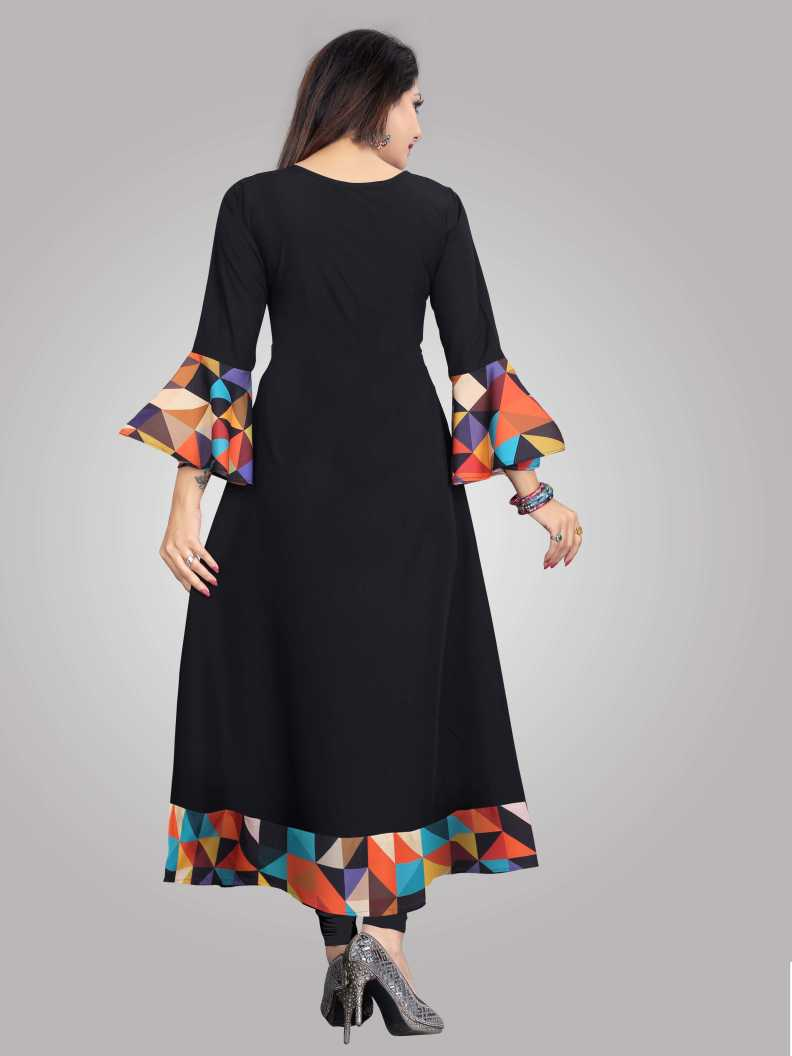

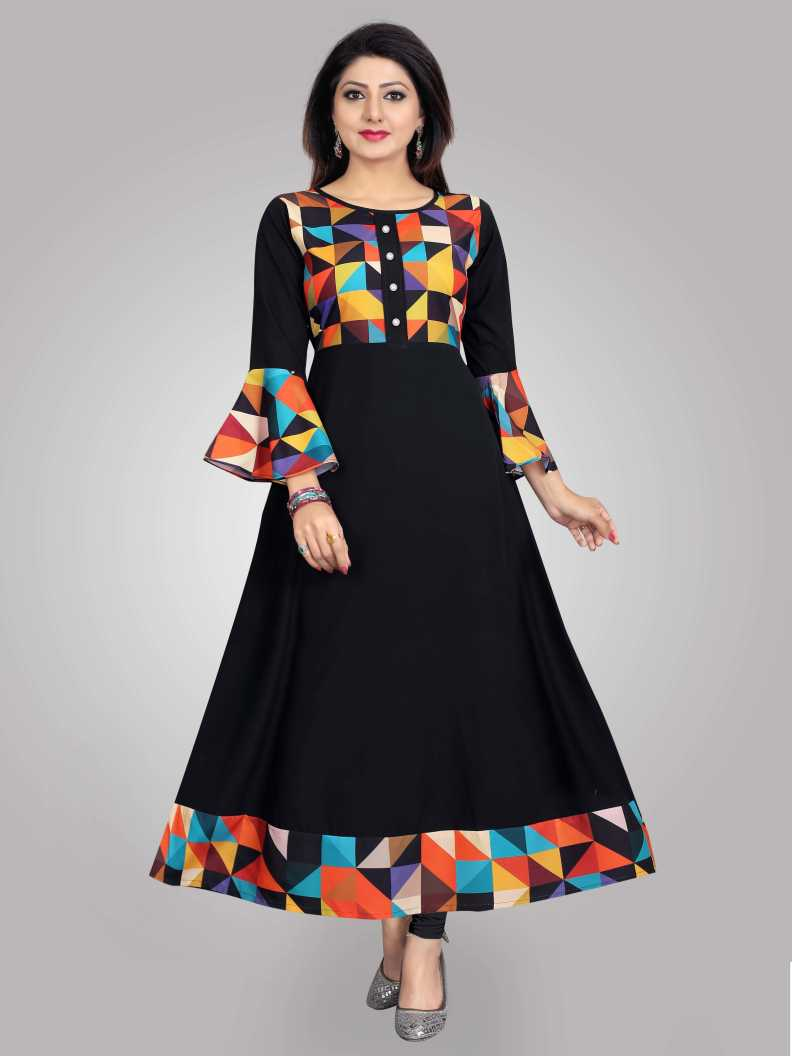

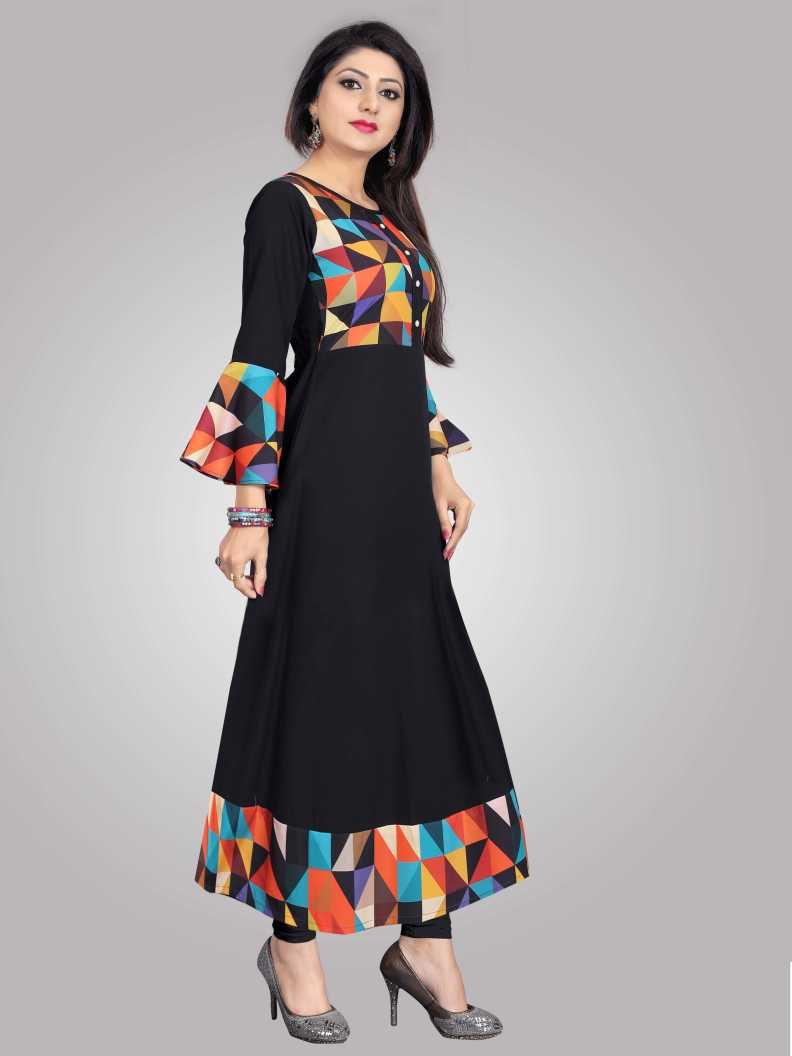

In [346]:
for img in cluster_1_imgs:
  display(Image('/content/pics/'+img))